# Проект: Анализ бизнес показателей

**Цель исследования:** Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.


**Описание данных**

В вашем распоряжении три датасета. 

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, 

orders_info_short.csv — информацию о заказах, а 

costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
User Id — уникальный идентификатор пользователя,
Region — страна пользователя,
Device — тип устройства пользователя,
Channel — идентификатор источника перехода,
Session Start — дата и время начала сессии,
Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
User Id — уникальный идентификатор пользователя,
Event Dt — дата и время покупки,
Revenue — сумма заказа.

Структура costs_info_short.csv:
dt — дата проведения рекламной кампании,
Channel — идентификатор рекламного источника,
costs — расходы на эту кампанию.

**План проекта**

1. Загрузка данных и их подготовка к анализу


2. Функции для расчёта и анализа LTV, ROI, удержания, конверсии и построения графиков.


3. Исследовательский анализ данных

 3.1. Составление профилей пользователей. 
 
 3.2. Минимальная и максимальная дата привлечения пользователей.
 
 3.3. Определение стран пользователей и платещих пользователей приложения.
 
 3.4. Определение устройств клиентов и платящие пользователей. 
 
 3.5. Рекламные источники привлечения и каналы, из которых пришло больше всего платящих пользователей.
 
 
4. Маркетинг

 4.1. Расчет общей суммы расходов на маркетинг.
 
 4.2. Распределение трат по рекламным источникам.
 
 4.3. Динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
 

5. Окупаемость рекламы

 5.1. Окупаемость рекламы
 
 5.2. Конверсия пользователей и динамика её изменения. Удержание пользователей и динамика изменения. 
 
 5.3. Окупаемость рекламы с разбивкой по устройствам, странам и рекламным каналам. 
 

6. Выводы


# Загрузка данных и их подготовка к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')  # визиты
    orders = pd.read_csv('/datasets/orders_info_short.csv')  # заказы
    costs = pd.read_csv('/datasets/costs_info_short.csv')  # расходы

except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
#переводим название столбцов в нижний регистр
#заменяем пробел на "_"
visits.columns = visits.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.replace(' ', '_')
costs.columns = costs.columns.str.replace(' ', '_')
#переводим названия в нижний регистр
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [10]:
#проверяем корректную замену названий столбцов
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [11]:
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [12]:
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [13]:
#проверяем наличие пропусков в дата фреймах
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [14]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [15]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [16]:
# преобразуем данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])
 

In [17]:
visits['session_year'] = visits['session_start'].dt.year
visits['session_month'] = visits['session_start'].dt.month
visits['session_week'] = (
    visits['session_start'].dt.isocalendar().week
)


In [18]:
costs['dt_year'] = costs['dt'].dt.year
costs['dt_month'] = costs['dt'].dt.month
costs['dt_week'] = costs['dt'].dt.isocalendar().week

In [19]:
#проверяем тип данных
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
 6   session_year   309901 non-null  int64         
 7   session_month  309901 non-null  int64         
 8   session_week   309901 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](2), int64(3), object(3)
memory usage: 20.4+ MB


In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [21]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   dt        1800 non-null   datetime64[ns]
 1   channel   1800 non-null   object        
 2   costs     1800 non-null   float64       
 3   dt_year   1800 non-null   int64         
 4   dt_month  1800 non-null   int64         
 5   dt_week   1800 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 79.2+ KB


Проверяем дата сеты на полные дубликты строк

In [22]:
visits.duplicated().sum()

0

In [23]:
orders.duplicated().sum()

0

In [24]:
costs.duplicated().sum()

0


**Вывод:** В дата сете visits содержится 309901 строка с сессиями пользователей в приложении. В orders содержится 40212 строки с покупками клиентов в приложении. Costs содержит 1800 строку с оплатой рекламы в каналах привлечения.
  Перевели названия столбцов в нижний регистр.
  Пропусков в значения дата сетов и полных дубликатов строк не найдено.


# Функции для расчёта и анализа LTV, ROI, удержания, конверсии и построения графиков.

## Функция для построения таблицы профелей пользователей

In [25]:
# функция для построения таблицы профелей пользователей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC
events = None #других событий нет, None — чтобы не «сломать» get_profiles()

## Функция для расчёта удержания

In [26]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

## Функция для расчёта конверсии

In [27]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['dt']).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

## Функция для расчёта LTV и ROI

In [28]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['dt']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

## Функция для сглаживания фрейма

In [29]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

## Функция для визуализации удержания

In [30]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

## Функция для визуализации конверсии

In [31]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Функция для визуализации LTV и ROI

In [32]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

# Исследовательский анализ данных

## Профили пользователей

Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [33]:
# меняем тип данных врмени для корректной работы функции
costs['dt'] = costs['dt'].dt.date

In [34]:
profiles = get_profiles(visits, orders, events, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [35]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


В результате мы получили 150008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном источнике, который мотивировал пользователя посетить интернет-магазин.

In [36]:
last_day = profiles['dt'].max()
last_day = pd.to_datetime(last_day)  
display('Максимальная дата привлечения клиента', last_day)

'Максимальная дата привлечения клиента'

Timestamp('2019-10-27 00:00:00')

In [37]:
first_day = profiles['dt'].min()
first_day = pd.to_datetime(first_day)  
display('Минимальная дата привлечения клиента', first_day)

'Минимальная дата привлечения клиента'

Timestamp('2019-05-01 00:00:00')

В данных содержатся записи о пользовательских сесиий за периода с 01.05.2019 по 27.10.2019.

Выясним, количество привлеченных пользователей из каждой страны. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [38]:
(profiles.groupby('region')
.agg({'user_id': 'nunique','payer': 'mean'})
.sort_values(by='payer', ascending=False)# допишите код
)

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


Выясним, каким устройством редпочитают пользоваться клиенты. Построим таблицу с разбивкой по устройствам и долю платящих пользователей.

In [39]:
(profiles.groupby('device')
.agg({'user_id': 'nunique','payer': 'mean'})
.sort_values(by='payer', ascending=False)# допишите код
)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


Посчитаем количество пользователей, привлеченным каждым рекламным каналом и долю платящих для каждого канала привлечения.

In [40]:
(profiles.groupby('channel')
.agg({'user_id': 'nunique','payer': 'mean'})
.sort_values(by='payer', ascending=False)# допишите код
)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


**Выводы:**

Таким образом мы выяснили, что за период с 01.05.2019 по 27.10.2019 приложение скачало 150008 клиентов.

Большую долю порядка 66.67 % от общего числа занимают ользователи и США, так же среди них большое количество клиентов использующих платную подписку 6,9 %. 

Самое популярное устройство - iPhone - 36 % клиентов устанавливали приложение на него. Больше всего использовали платные функции приложения клиенты с Mac (6,36 %) и iPhone (6,2 %)

Самое большое число клиентов, порядка 37 % - это органические пользователи. Из них платными сервисами пользуется в  среднем каждый 50, что является самым низким показателем из всех каналов привлечения. Следующими по наибольшему числу привлеченных пользователей является FaceBoom (20 %) и TipTop (13 %).

Самая большая конверсия у следующих каналов:

FaceBoom              29144  0.122049
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700

## Маркетинг


Расчет общей суммы расходов на маркетинг.

In [41]:
total_costs = costs['costs'].sum().round(2)
display(f'Общая сумма расходов на маркетинг составила ${total_costs}')

'Общая сумма расходов на маркетинг составила $105497.3'

Распределение трат по рекламным источникам выглядит следующим образом.

In [42]:
costs_channel = (costs.groupby('channel')
.agg({'costs': 'sum'})
.sort_values(by='costs', ascending=False)
)


costs_channel['share'] = (costs_channel['costs']/(costs_channel['costs'].sum())*100).round(2)
costs_channel

,costs,share
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


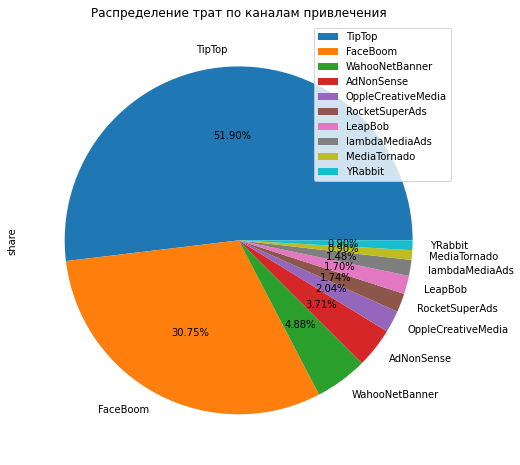

In [43]:
costs_channel.plot(kind='pie', y='share', autopct='%1.2f%%', figsize=(8,8),
                   title='Распределение трат по каналам привлечения')
plt.show()

Таким образом мы видим, что половина расходов на рекламу приходится на канал TipTop, еще 30% было потрачено на FaceBoom. Остальные 20 % распределены по остальным 8 рекламным источникам.


## Динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику.

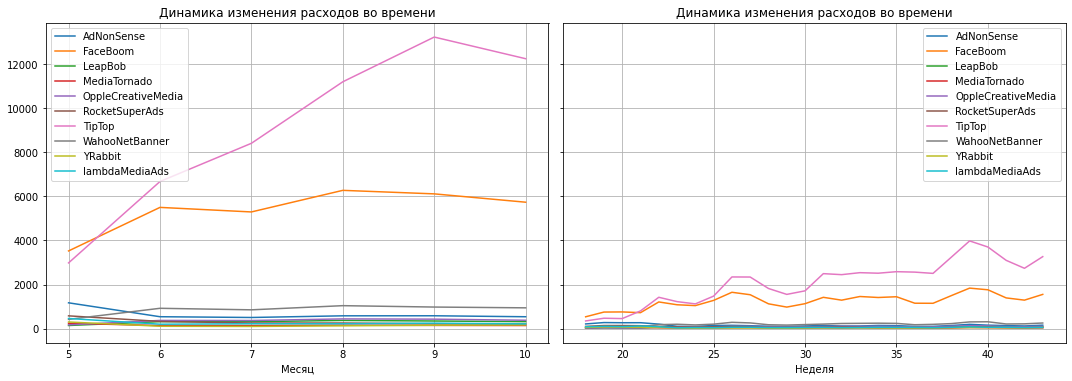

In [44]:
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(2, 2, 1)
(
    costs.pivot_table(index=['dt_month'], columns= ['channel'], values='costs', aggfunc='sum')
    .plot(grid=True, ax=ax1)
)
plt.legend()
plt.xlabel('Месяц')
plt.title('Динамика изменения расходов во времени')

ax2 = plt.subplot(2, 2, 2, sharey = ax1)
(
    costs.pivot_table(index=['dt_week'], columns= ['channel'], values='costs', aggfunc='sum')
    .plot(grid=True, ax=ax2)
)
plt.legend()
plt.xlabel('Неделя')
plt.title('Динамика изменения расходов во времени')
plt.tight_layout()
plt.show()


Из графика динамики расходов, мы видим, что стоимость затрат на рекламу в TipTop с 01.05.2019 выросла в 4 раза. Расходы на остальные каналы изменялась в течение анализируемого времени не существенно.


## Расчет CAC

Посчитаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [45]:
channel_cac = (profiles.query('channel != "organic"') #исключаем клиентов с канала organic
.groupby('channel')
.agg({'acquisition_cost': 'mean'})
.sort_values(by='acquisition_cost', ascending=False)# допишите код
)
channel_cac['cac_mean'] = channel_cac['acquisition_cost'].mean()
channel_cac

,acquisition_cost,cac_mean
channel,,
TipTop,2.799003,0.755735
FaceBoom,1.113286,0.755735
AdNonSense,1.008054,0.755735
lambdaMediaAds,0.724802,0.755735
WahooNetBanner,0.602245,0.755735
RocketSuperAds,0.412095,0.755735
OppleCreativeMedia,0.250000,0.755735
YRabbit,0.218975,0.755735
MediaTornado,0.218717,0.755735



Канал TipTop в 3,7 раз превышает средние расходы на рекламу по другим каналам.


**Выводы:**


Общая сумма расходов на маркетинг составила 105497.3.
Самыми затратными для привлечения канлами стали: TipTop (54751.3 или 51,9 процентов от общего рекламного бюджета) и FaceBoom (32445,6 или 30,75 процентов).
При этом следует отметить, что стоимость затрат на рекламу в TipTop с 01.05.2019 выросла в 4 раза.
Один привлеченный пользватель из TipTop в среднем стоит 2.8, что сильно превышает в 3,7 раза средние расходы на рекламу по всем каналам.

## Оценка окупаемости рекламы


Установим момент и горизонт анализа данных. Предположим, что на календаре 1 ноября 2019 года, и зададим горизонт анализа - 14 дней.

In [46]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 
#costs['dt'] = costs['dt'].dt.date
orders['event_dt'] = orders['event_dt'].dt.date

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi()

Так как нас интересует окупаемость рекламных компаний, то исключим из нашего анализа клиентов, на привлечение которых не были потрачены деньги.

Исключим из анализа клиентов с категорией канала привлечения organic.

In [47]:
users = profiles.query('channel != "organic"')

In [48]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(users, orders, observation_date, horizon_days)



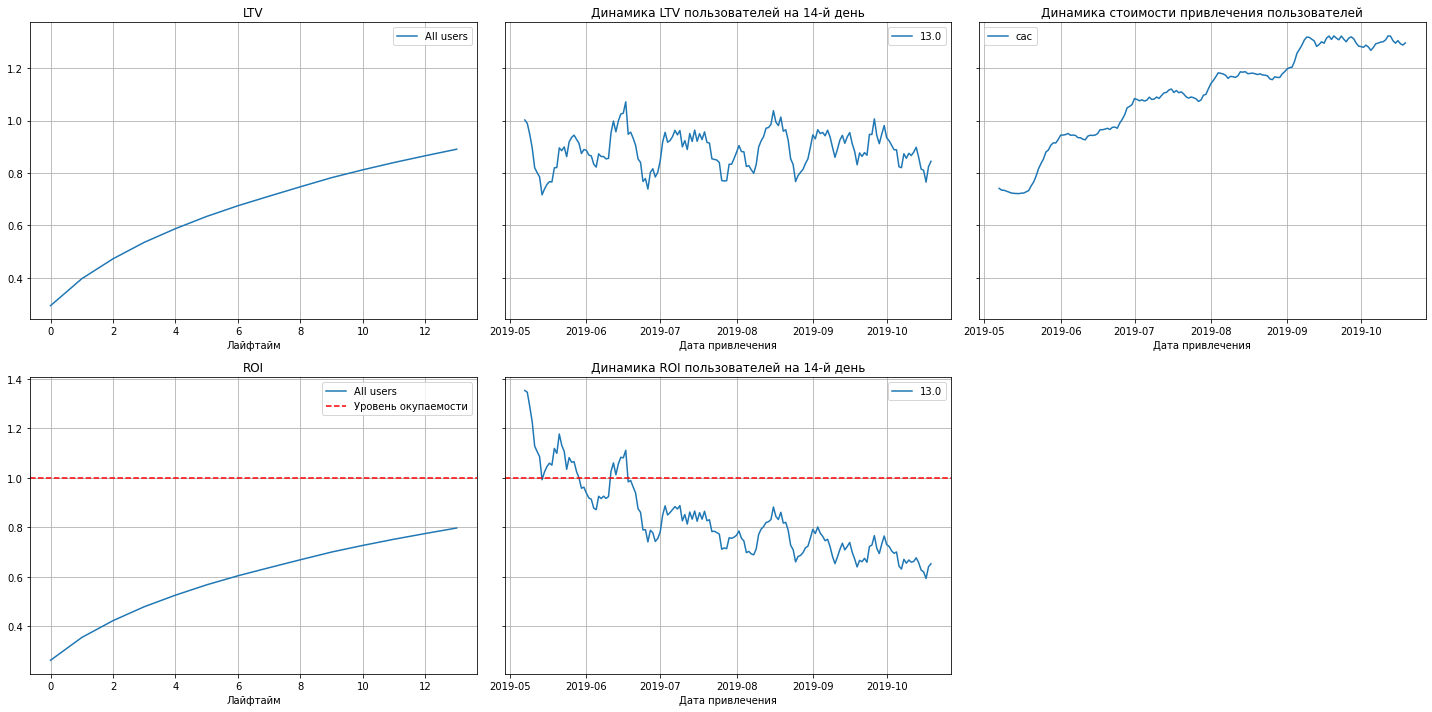

In [49]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По данным графикам можно сделать такие выводы:
Стоимость привлечения клиентов за исследуемый промежуток времени постоянно растет.
С конца мая 2019 года реклама перестала окупаться.
Динамика LTV говорит нам о том, что размер LTV находится практически в одном коридоре значений и не имеет тендеции к росту.
Таким образом можно сделать вывод, что действующая рекламная компания не эффективна и увеличение вливания денежных средств в рекламу не приводит к увеличению пожизненной ценности клиента.
Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

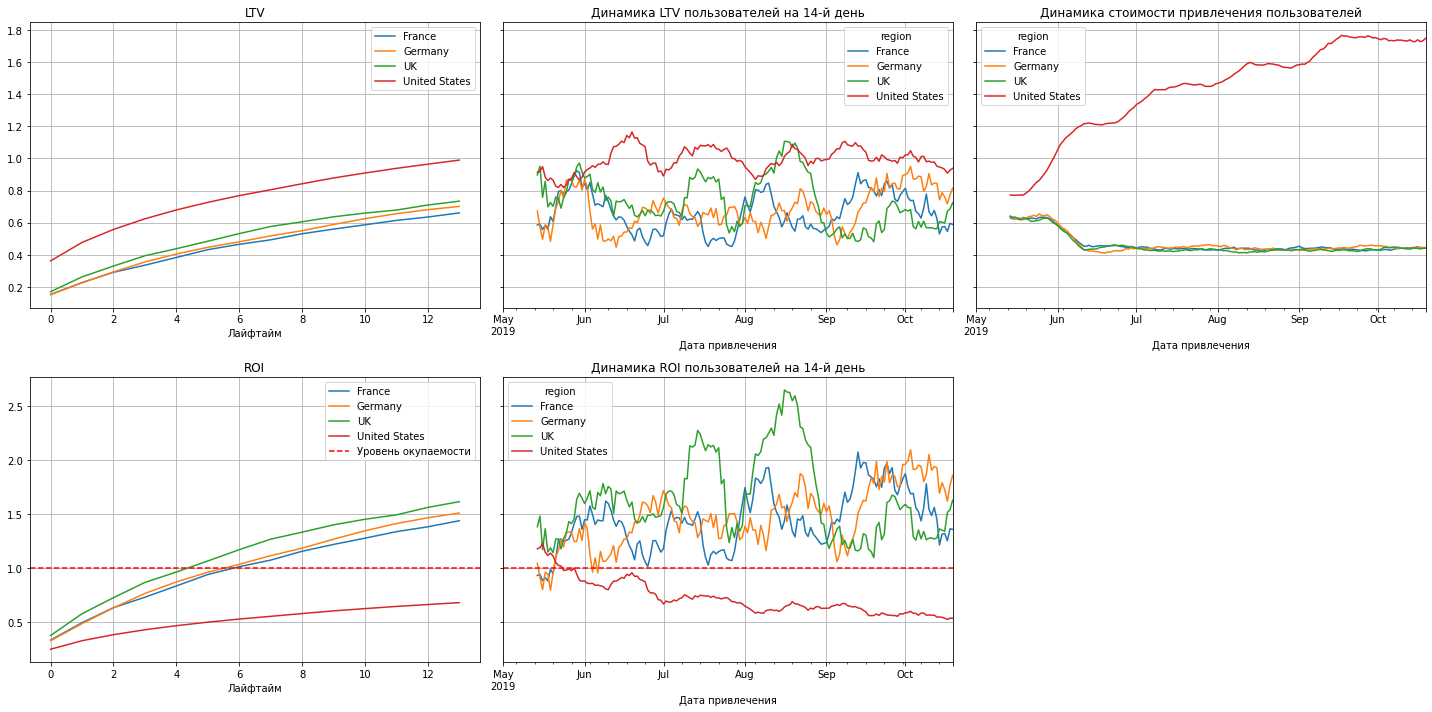

In [50]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По данным графикам можно отметить, что не смотря на больший объем трат в приложении клиентов из США, в связи с ростом CAC, реклама в США не окупается. 
Остальные страны показываю схожие между собой результаты. Стоимость привлечения клиентов из них снижается с середины июня. Реклама стабильно окупается. 

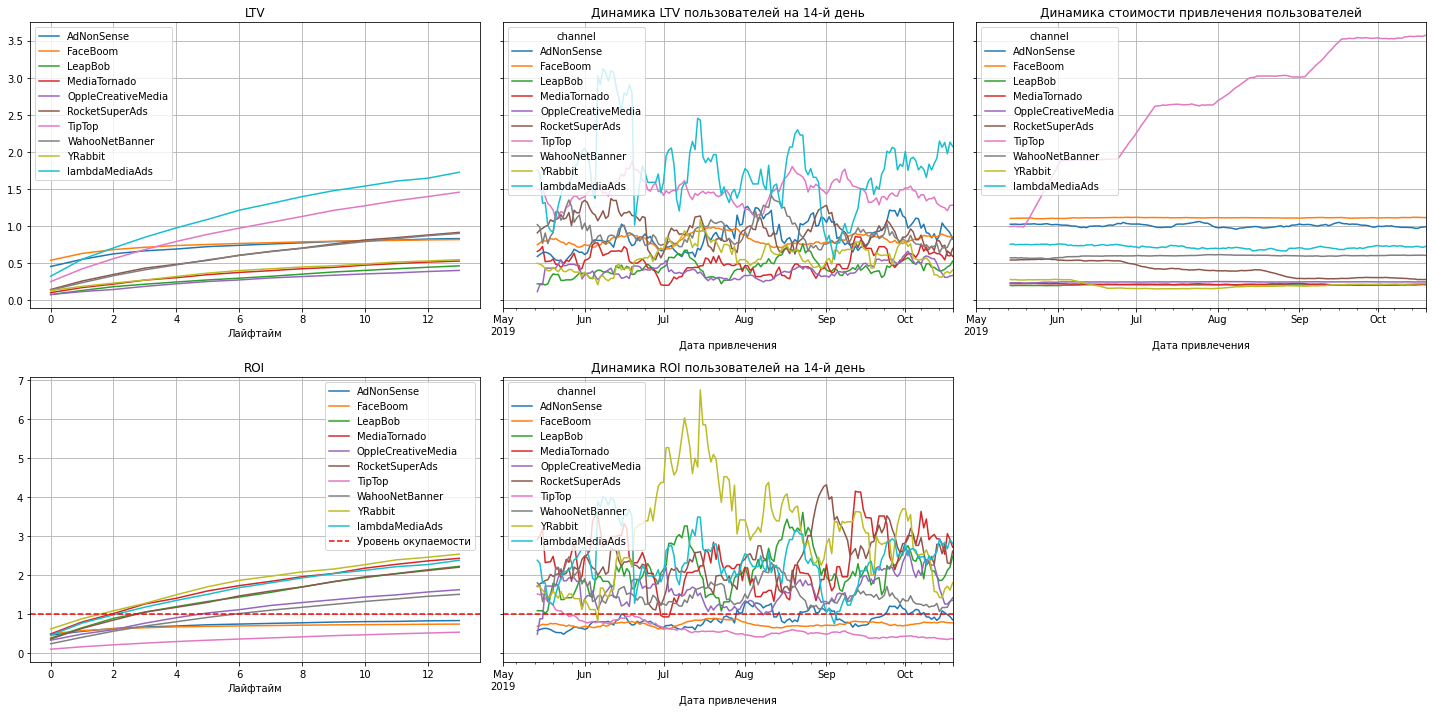

In [51]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Из данных видно, что текущая рекламная компания была в первую очередь направлена на канал Tip Top. Не смотря на большие расходы в рекламе. Пользователи, пришедшие с канала Tip Top, не совершают много покупок, реклама не окупается. Так же не окупется реклама в каналах FaceBoom и AdNonSense. 
Среди каналов хочется отметить lambdaMediaAds, Media Tornado и YRabbit. 
lambdaMediaAds имеет наибольший рост LTV. При стабильных тратах на рекламу, ROI уверенно держится выше 1.
Рекламные каналы YRabbit и Media Tornado имеют самые низкие расходы на рекламу, реклама в них окупается рагьше всего.


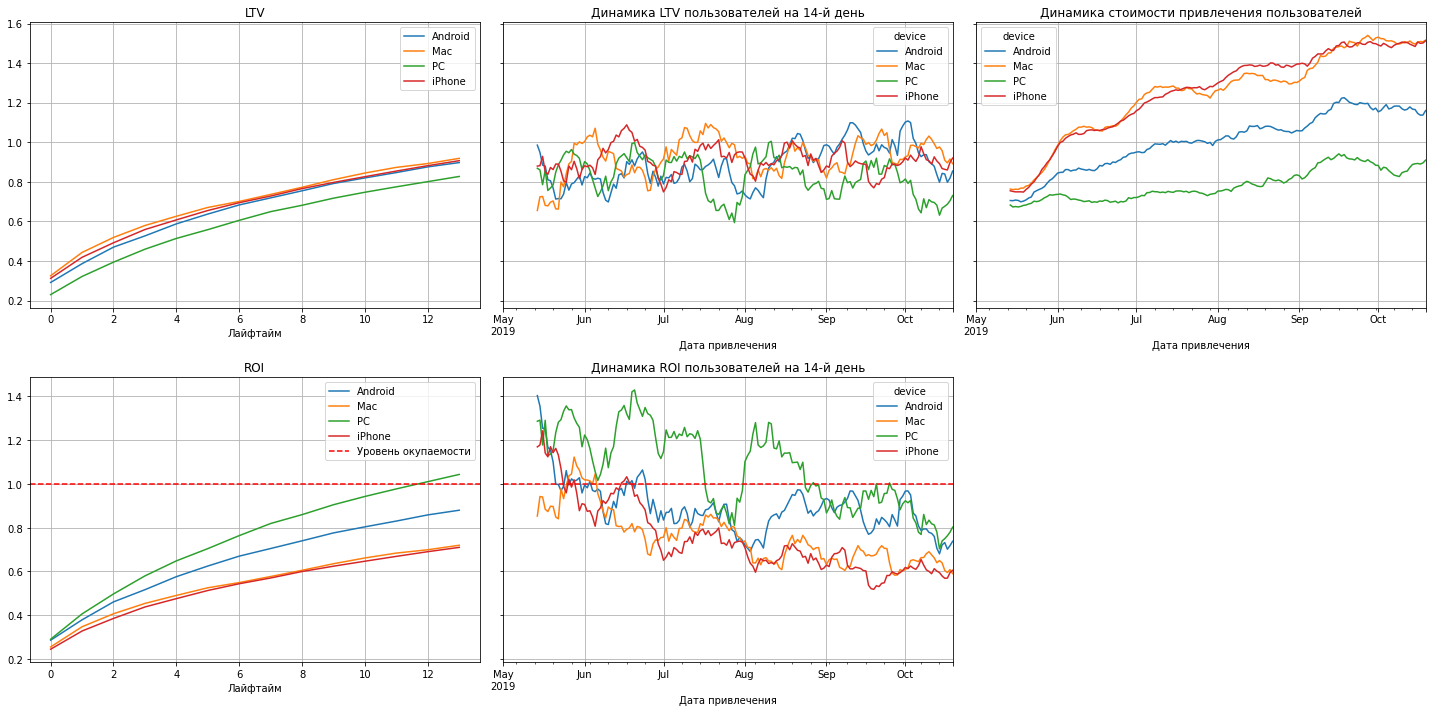

In [52]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Единственные клиенты, которые окупаются в timelife 14 дней - это пользватели PC. 

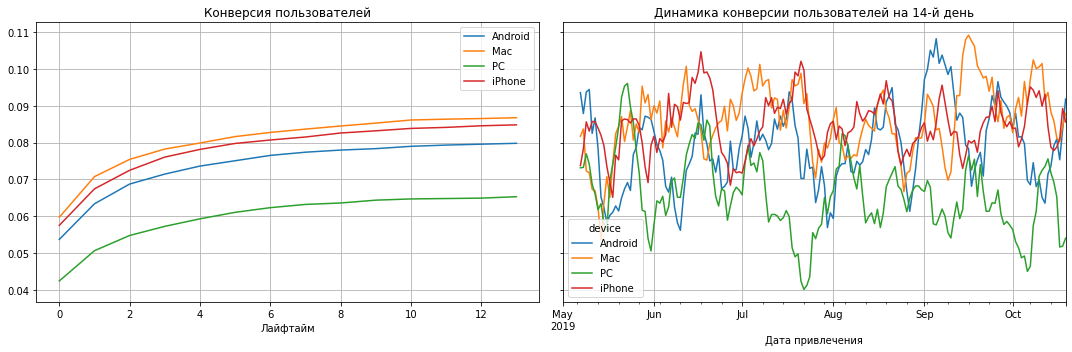

In [53]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(users, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи Mac, iPhone конвертируются очень хорошо, причём постоянно.


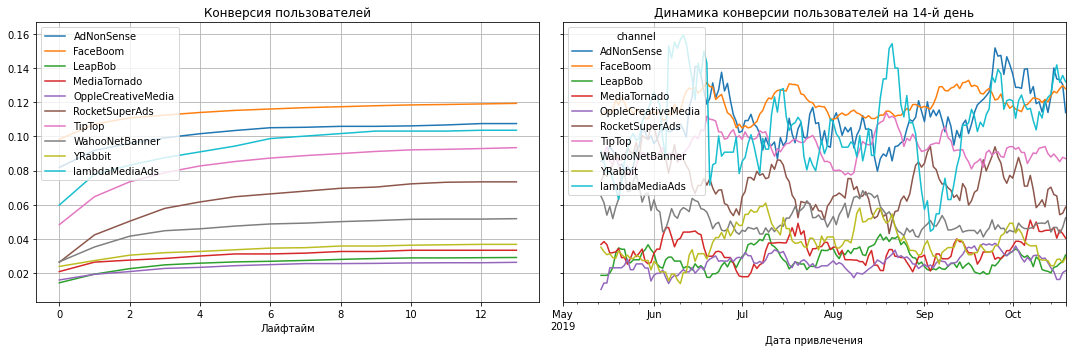

In [54]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    users, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

Топ-3 канала по конверсии: Face Boom,  AdNoneSense, lambdaMediaAds. При этом Tip Top, на который приходится более 50% рекламных трат по конверсии пользователей только 4-ый.


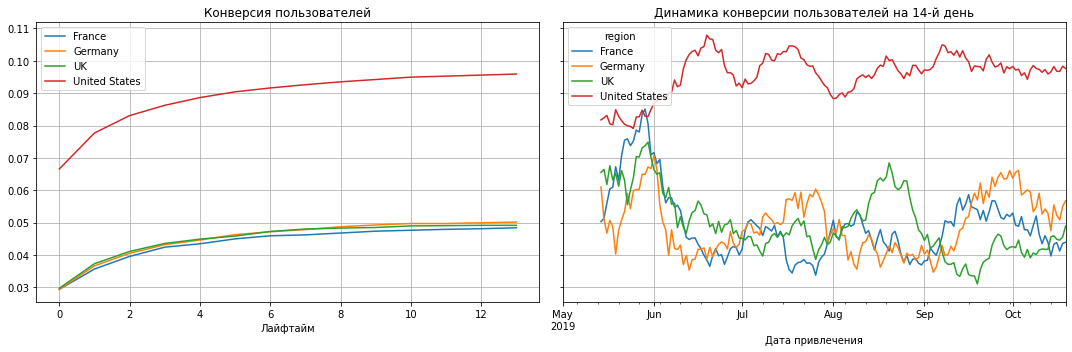

In [55]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    users, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

Как видим из графика, лучше всего конвертируются пользователи из США.


Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках коэффициент удержания.

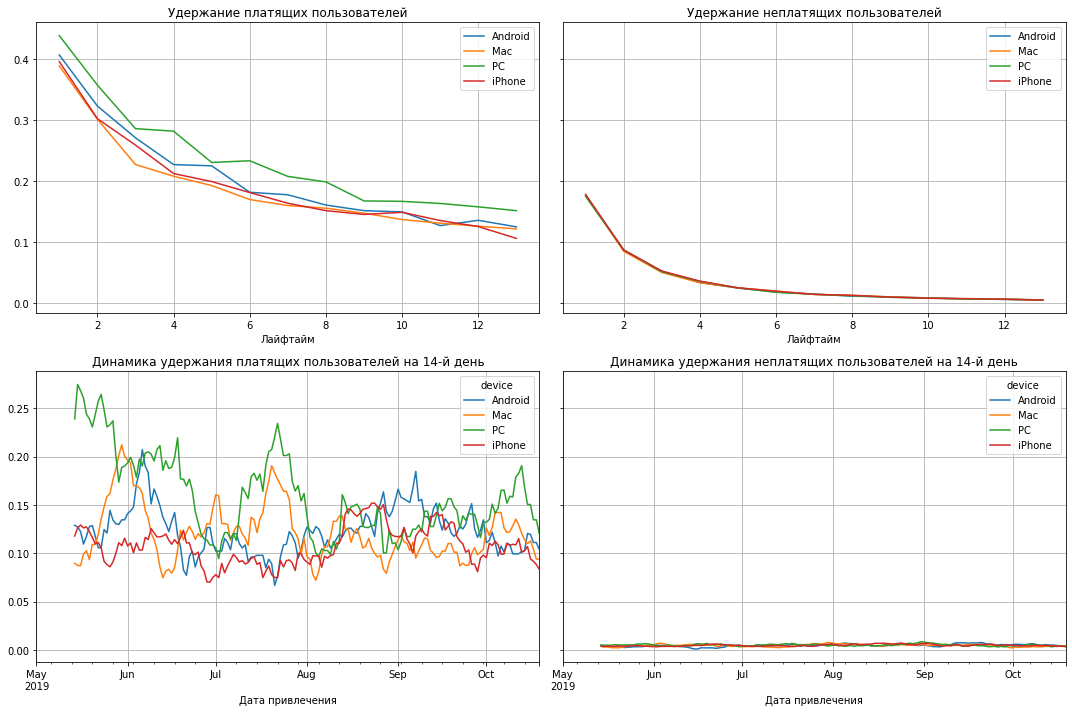

In [56]:
# смотрим удержание с разбивкой по устройствам

dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи Mac, iPhone стабильно плохо удерживаются. Для платящих пользователей наилучшее удержание у пользователей PC. Не платящие пользователи удерживаются одинаково.

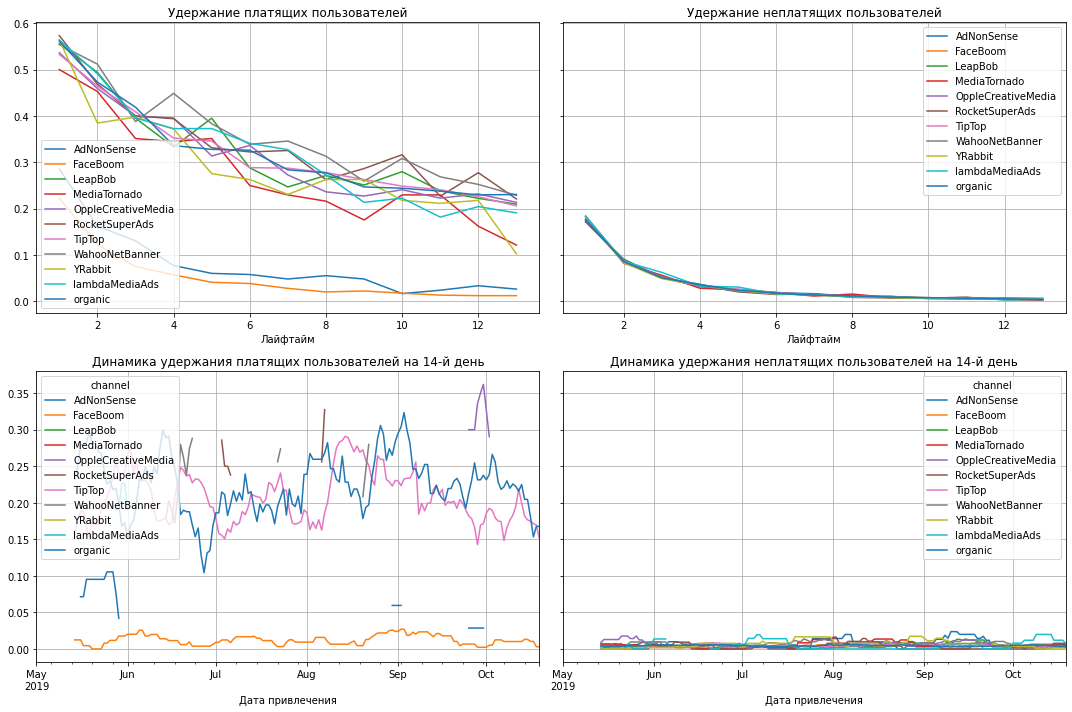

In [57]:
# смотрим удержание с разбивкой по каналам

dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По коэффициенту удержания выделяются платящие пользователи перешедшие с каналов Face Boom, AdNoneSense - они удерживаются значительно хуже других. Не платящие пользователи удерживаются одинаково.

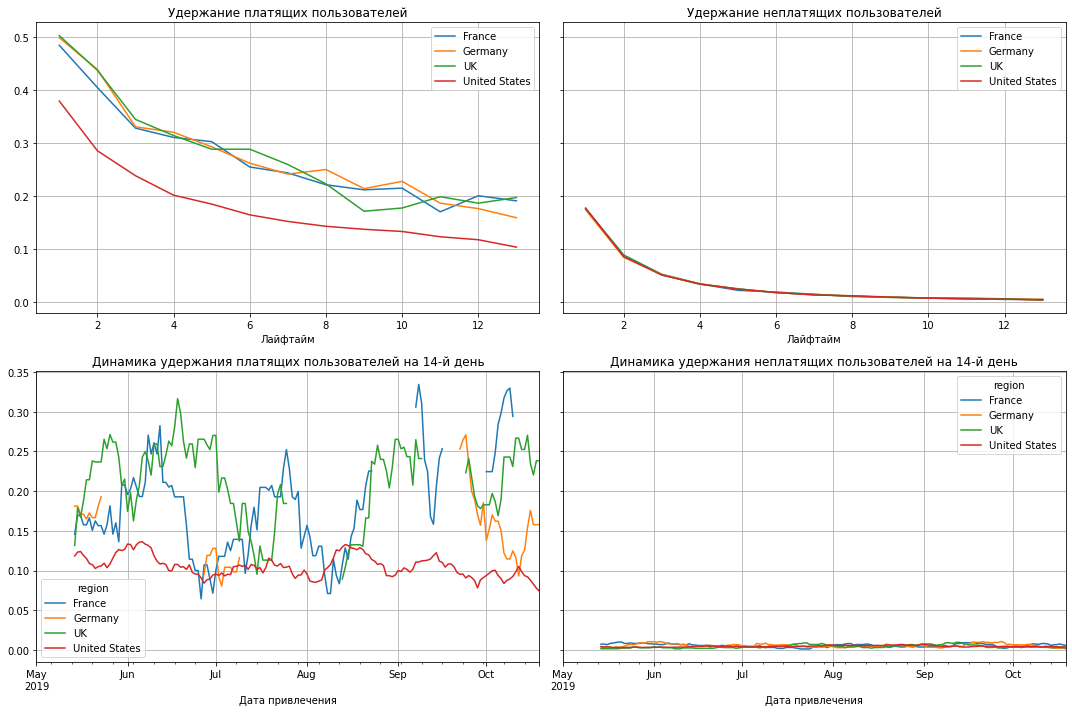

In [58]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

У платящих пользователей из США удержание ниже других стран. Не платящие пользователи удерживаются одинаково.


Посмотрим детально рынок США


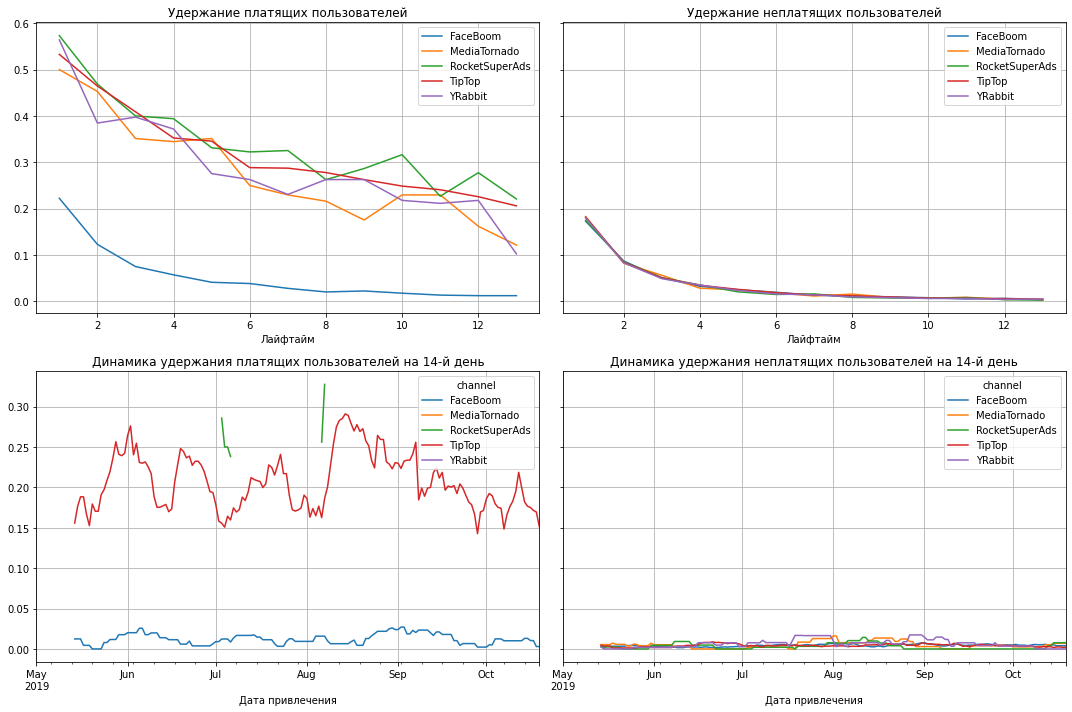

In [59]:
data_usa = users.query('region == "United States"')
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    data_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Платящие пользователи из канала FaceBoom удерживаются хуже всего.

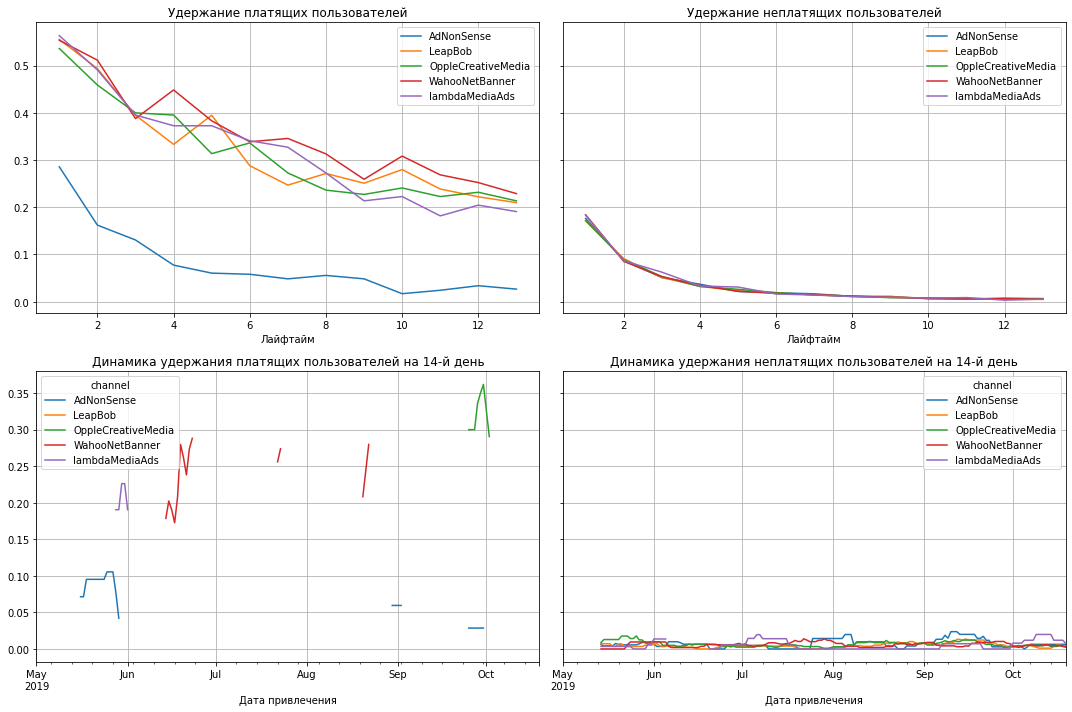

In [60]:
data_usa = users.query('region != "United States"')
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    data_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

В Европе хуже всего удержание у канала AdNonSense.

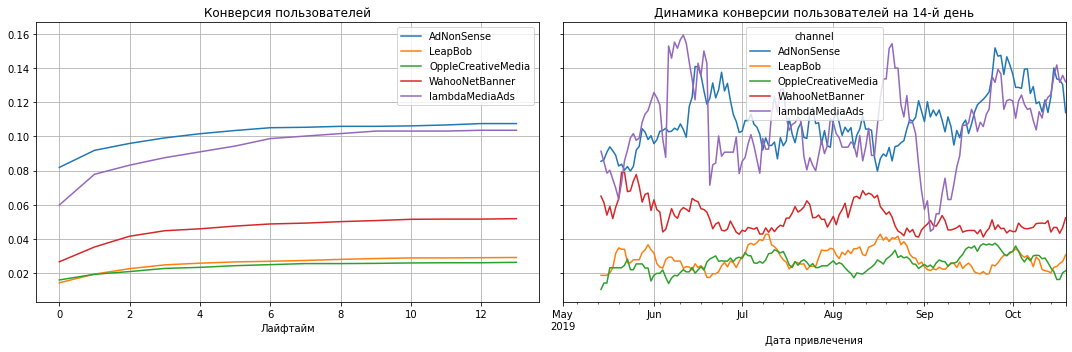

In [61]:
data_usa = users.query('region != "United States"')
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    data_usa, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

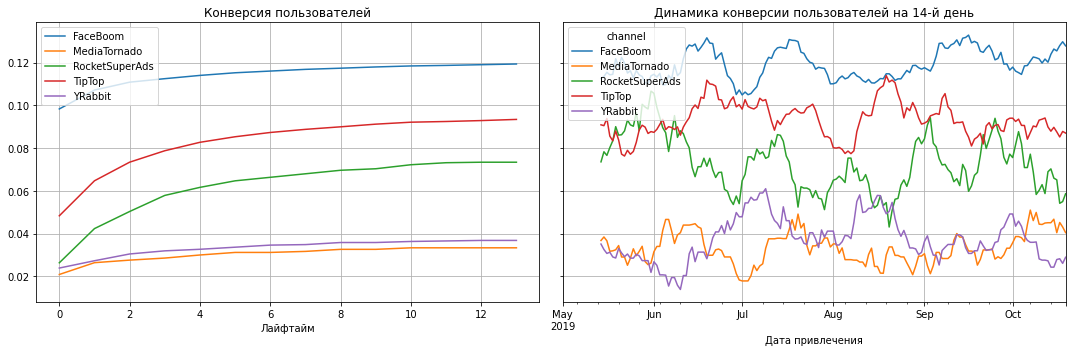

In [62]:
data_usa = users.query('region == "United States"')
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    data_usa, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

**Выводы:**

За постоянным увеличением рекламного бюджета не последовал рост выручки, получаемых от пользователей. 
С конца мая 2019 года реклама в целом перестала окупаться.

Данная рекламная компания направлена в большей части на рынок США. Но размер LTV пользователей США находится практически в одном коридоре значений и не имеет тендеции к росту. У платящих пользователей из США удержание ниже других стран. Не смотря на высокую конверсию - реклама в США не окупается.

Из данных видно, что текущая рекламная компания была в первую очередь направлена на канал Tip Top. Не смотря на большие расходы в рекламе (около 50 % от всех рекламных трат). Пользователи, пришедшие с канала Tip Top, не совершают много покупок. Tip Top по конверсии пользователей только 4-ый, реклама по этому каналу не окупается.

Каналы Face Boom, AdNoneSense имеют высокую конверсию, но низкое удержание, реклама в этих каналах не окупается.

Среди каналов хочется отметить lambdaMediaAds, Media Tornado и YRabbit. 
lambdaMediaAds имеет наибольший рост LTV. При стабильных тратах на рекламу, ROI уверенно держится выше 1.
Рекламные каналы YRabbit и Media Tornado имеют самые низкие расходы на рекламу, реклама в них окупается раньше всего.

Единственные клиенты, которые окупаются в timelife 14 дней - это пользователи PС, но и они с сентября стали плохо окупаться. Пользователи Mac, iPhone стабильно плохо удерживаются. Для платящих пользователей наилучшее удержание у пользователей PC. Не платящие пользователи удерживаются одинаково.

Таким образом можно сделать вывод, что действующая рекламная компания не эффективна. 


# Общий вывод:

За исследуемый период с 01.05.2019 по 27.10.2019 приложение скачало 150008 клиентов.
На рекламу было потрачено 105497.30

Большую долю клиентов порядка 66.67 % от общего числа занимают пользователи и США, так же среди них большое количество клиентов использующих платную подписку 6,9 %. 

Самое популярное устройство - iPhone - 36 % клиентов устанавливали приложение на него. Больше всего использовали платные функции приложения клиенты с Mac (6,36 %) и iPhone (6,2 %)

Самое большое число клиентов, порядка 37 % - это органические пользователи. Из них платными сервисами пользуется в  среднем каждый 50, что является самым низким показателем из всех каналов привлечения. Следующими по наибольшему числу привлеченных пользователей является FaceBoom (20 %) и TipTop (13 %).


На основании проведенного анализа данных мы делаем вывод, что действующая рекламная компания не эффективна. Реклама не окупается. Причинами являются:

1.Канал TipTop - сильное увеличение САС. Которое влияет на ROI рынка США.

2.Каналы FaceBoom, AdNonSense - не смотря на высокую конверсию, пользователи плохо удерживаются.

Таким образом два самых крупных канала (TipTop и FaceBoom) по числу перешедших пользователей и размеру рекламных вложений, оказывают существеной влияние на окупаемость рекламы в США и рекламной компании в целом по всем странам.

**Рекомендации отделу маркетинга:**

Срезать рекламные бюджеты на канал Tip Top (США). У пользователей этого канала хорошее удержание, но высокие затраты на рекламу, не дают ей окупиться.

Убрать рекламу из источника AdNonSense (Европа). Реклама там слишком дорогая, не смотря на высокую коверсию, пользователи не лояльны к последующим покупкам и не слишком активно привлекаются. Тоже можно сказать и про канал FaceBoom (США)

Стоит рассмотреть возможность увеличения вливаний в рекламу через каналы для США: lambdaMediaAds, WahooNetBanner, для рынка Европы: Media Tornado, YRabbit и Rocket. По этим каналам высокий LTV и удержание пользователей, но клиентов слишком мало для того чтобы они могли приносить существенную прибыль.
